# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [1]:
import numpy as np
import pandas as pd

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

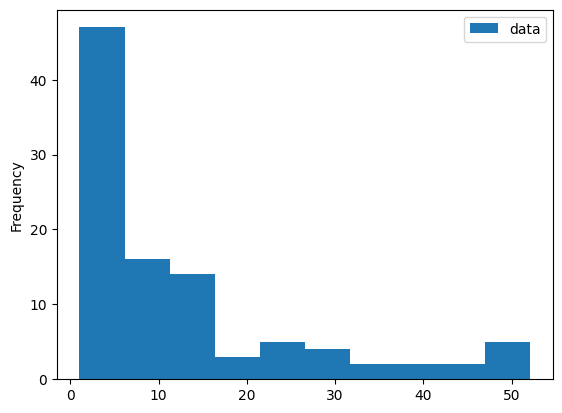

In [2]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

<Axes: >

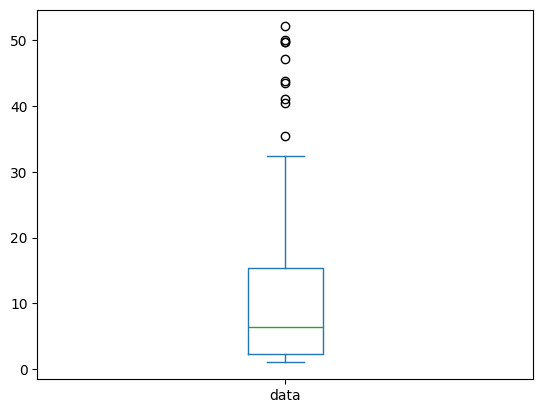

In [3]:
df.plot.box()

## Histogram:
Pros: Shows the distribution of data, highlighting the frequency of price ranges and revealing patterns like skewness or modality.
Cons: Doesn't clearly indicate specific statistical measures like median or quartiles.

## Boxplot:
Pros: Summarizes data using median, quartiles, and potential outliers, providing a concise view of data dispersion and central tendency.
Cons: Doesn't display the detailed distribution shape or frequency of data points within ranges.

## My Choice:

I'll use a histogram to understand the overall distribution and frequency of prices.
I'll use a boxplot for a concise summary of data spread and to identify outliers.

## Formatting Improvements:

For the histogram: I'll add a KDE (Kernel Density Estimate) line to smooth the distribution curve.
For the boxplot: Will overlay individual data points (e.g. using a swarm plot) to visualize data density.


# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15171 entries, 0 to 15170
Data columns (total 47 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   zpid                        15171 non-null  int64  
 1   city                        15171 non-null  object 
 2   streetAddress               15171 non-null  object 
 3   zipcode                     15171 non-null  int64  
 4   description                 15169 non-null  object 
 5   latitude                    15171 non-null  float64
 6   longitude                   15171 non-null  float64
 7   propertyTaxRate             15171 non-null  float64
 8   garageSpaces                15171 non-null  int64  
 9   hasAssociation              15171 non-null  bool   
 10  hasCooling                  15171 non-null  bool   
 11  hasGarage                   15171 non-null  bool   
 12  hasHeating                  15171 non-null  bool   
 13  hasSpa                      151

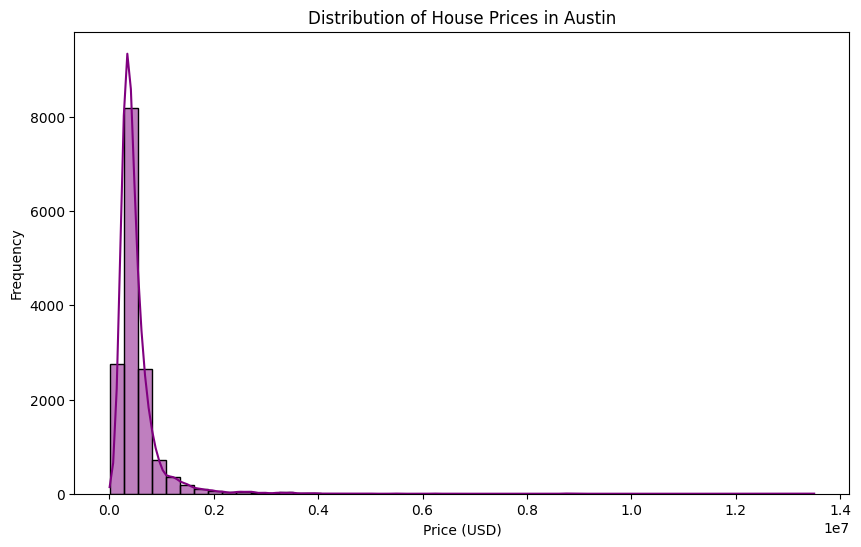

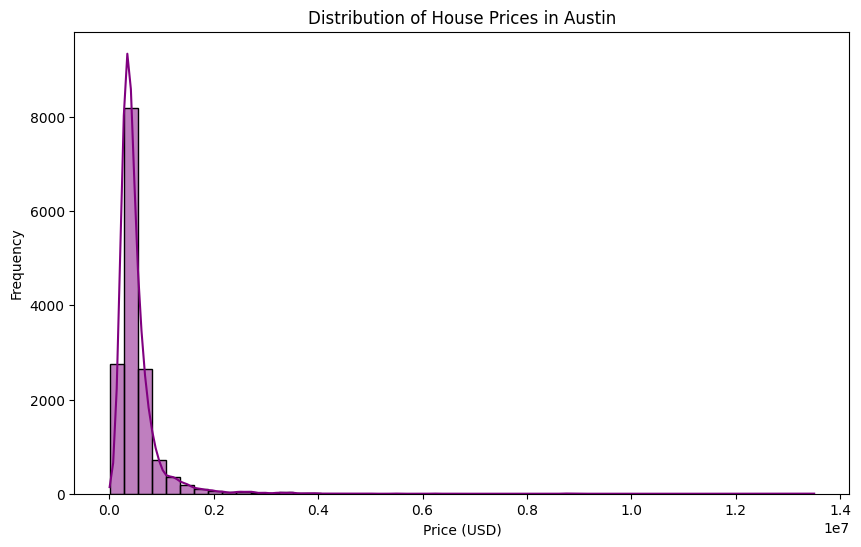

/tmp/ipykernel_5621/3200924315.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Property Type")


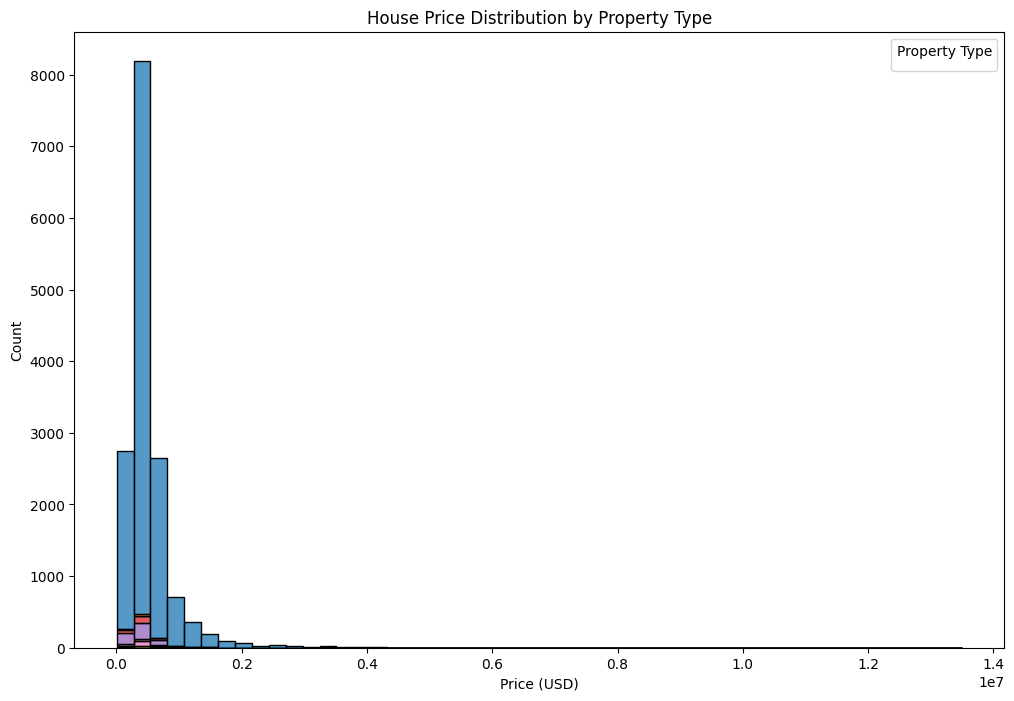

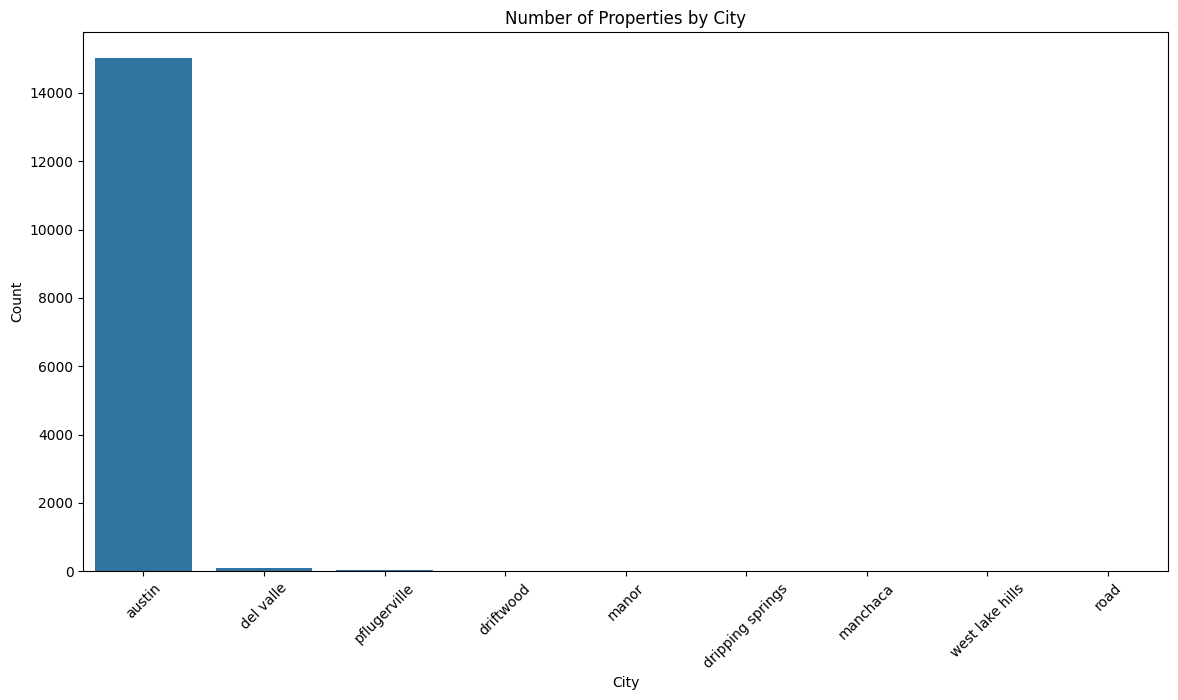

Mean Price: $512,767.74
Median Price: $405,000.00
Mode Price: $325,000.00


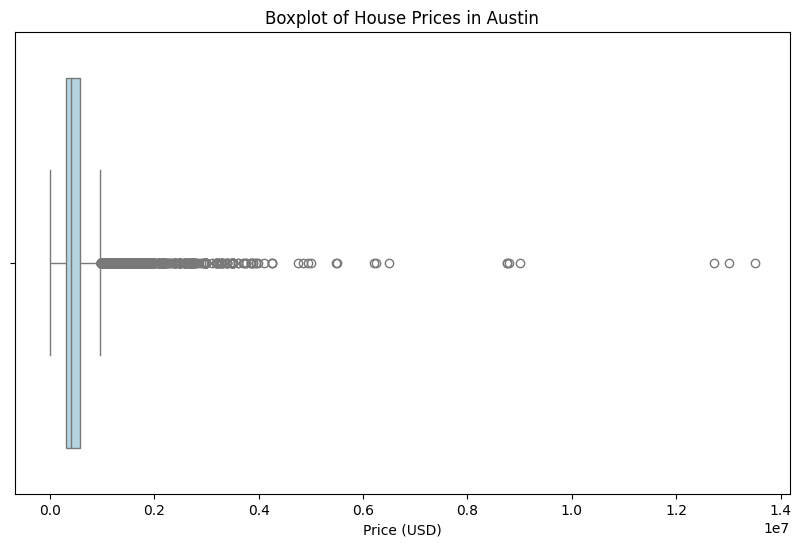

Skewness of Price Distribution: 8.85
Kurtosis of Price Distribution: 165.32


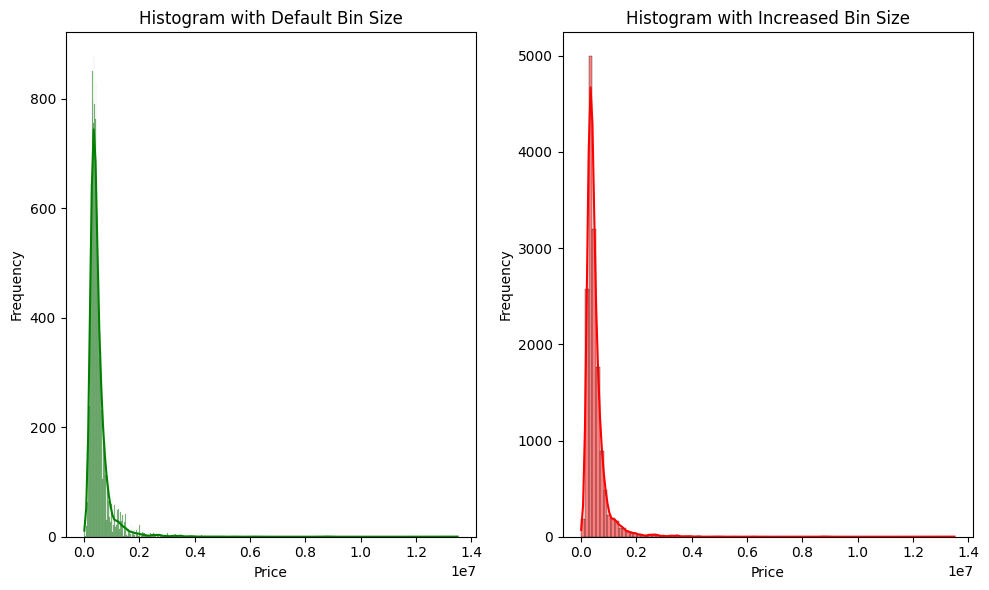

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
austin_listings = pd.read_csv('dataset/austinHousingData.csv')

# Display basic information
print(austin_listings.info())
print(austin_listings.describe())

plt.figure(figsize=(10, 6))
sns.histplot(austin_listings["latestPrice"], bins=50, kde=True, color="purple")
plt.title("Distribution of House Prices in Austin")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(austin_listings["latestPrice"], bins=50, kde=True, color="purple")
plt.title("Distribution of House Prices in Austin")
plt.xlabel("Price (USD)")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(data=austin_listings, x="latestPrice", hue="homeType", bins=50, multiple="stack")
plt.title("House Price Distribution by Property Type")
plt.xlabel("Price (USD)")
plt.ylabel("Count")
plt.legend(title="Property Type")
plt.show()

plt.figure(figsize=(14, 7))
sns.countplot(data=austin_listings, x="city", order=austin_listings["city"].value_counts().index)
plt.title("Number of Properties by City")
plt.xlabel("City")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

mean_price = austin_listings["latestPrice"].mean()
median_price = austin_listings["latestPrice"].median()
mode_price = austin_listings["latestPrice"].mode()[0]

print(f"Mean Price: ${mean_price:,.2f}")
print(f"Median Price: ${median_price:,.2f}")
print(f"Mode Price: ${mode_price:,.2f}")

plt.figure(figsize=(10, 6))
sns.boxplot(x=austin_listings["latestPrice"], color="lightblue")
plt.title("Boxplot of House Prices in Austin")
plt.xlabel("Price (USD)")
plt.show()

skewness = austin_listings["latestPrice"].skew()
kurtosis = austin_listings["latestPrice"].kurt()

print(f"Skewness of Price Distribution: {skewness:.2f}")
print(f"Kurtosis of Price Distribution: {kurtosis:.2f}")

plt.figure(figsize=(10, 6))

# Default bin size
plt.subplot(1, 2, 1)
sns.histplot(austin_listings["latestPrice"], kde=True, color="green")
plt.title("Histogram with Default Bin Size")
plt.xlabel("Price")
plt.ylabel("Frequency")

# Increased bin size
plt.subplot(1, 2, 2)
sns.histplot(austin_listings["latestPrice"], bins=100, kde=True, color="red")
plt.title("Histogram with Increased Bin Size")
plt.xlabel("Price")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()





# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

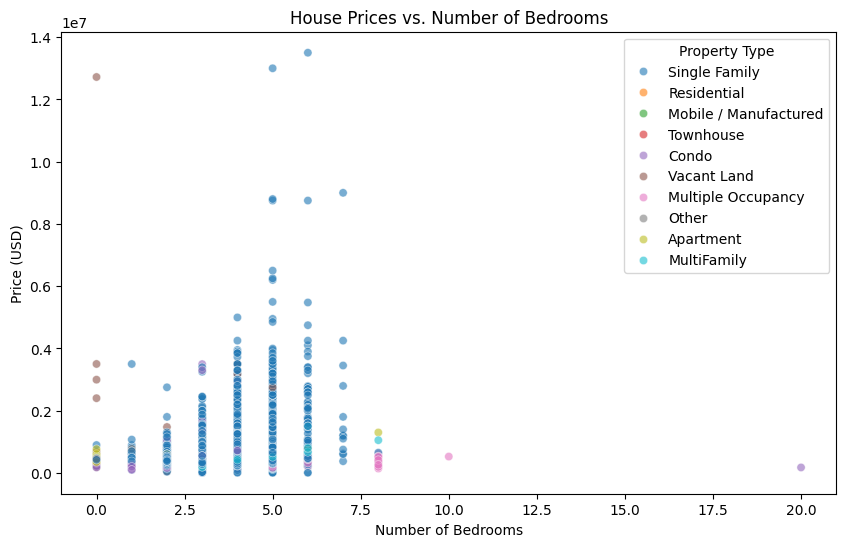

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=austin_listings, x="numOfBedrooms", y="latestPrice", hue="homeType", alpha=0.6)
plt.title("House Prices vs. Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price (USD)")
plt.legend(title="Property Type")
plt.show()
